# 1) OBTAINING AMERICAN STOK LIST FROM YAHOO FINANCE


In [ ]:
from selenium.webdriver import Chrome
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
from bs4 import BeautifulSoup
import time

# Initialize an empty DataFrame outside the function
df = pd.DataFrame()


def get_data(link):
    global df  # Add this line to refer to the global variable df inside the function
    chrome_driver = ChromeDriverManager().install()
    driver = Chrome(service=Service(chrome_driver))
    driver.get(link)
    time.sleep(1)
    accept_button = driver.find_element(By.XPATH, "//button[contains(text(), 'Accetta tutto')]")
    accept_button.click()
    time.sleep(1)
    data = []
    screener_results_div = driver.find_element(By.ID, "screener-results")
    screener_results_html = screener_results_div.get_attribute("innerHTML")
    soup = BeautifulSoup(screener_results_html, 'html.parser')
    rows = soup.find_all('tr')
    for row in rows:
        cols = row.find_all(['th', 'td'])
        cols = [col.text.strip() for col in cols]
        data.append(cols)
    data = [row for row in data if row]
    # Concatenate the data with the global DataFrame df
    df = pd.concat([df, pd.DataFrame(data[1:], columns=data[0])])


for i in range(0, 9900+100, 100):
    link = 'https://finance.yahoo.com/screener/unsaved/ee6758fa-5ef1-4c88-a096-4b6f14942ad3?count=100&offset=' + str(i)
    get_data(link)

print(df)
# You should quit the driver after you have collected all data.
driver.quit()

df.to_csv('us_stocks.csv', index=False)

# 2) IMPORTING OPTIONS DATASET


In [3]:
import pandas as pd

stocks = pd.read_csv('us_stocks.csv')
stocks

tickers_symbol = list(stocks['Symbol'])

In [4]:
import yfinance as yf
import pandas as pd
from datetime import datetime


data = pd.DataFrame()  # Initialize an empty DataFrame


for ticker_symbol in tickers_symbol:
    try:
        ticker = yf.Ticker(ticker_symbol)
        option_chain = ticker.option_chain()
        try:
            ticker_calls = option_chain.calls  # Extract calls data
            ticker_calls['ticker'] = ticker_symbol  # Add a column for ticker symbol
            ticker_calls['type'] = "Call" # Add a column for ticker symbol
            data = pd.concat([data, ticker_calls])  # Concatenate calls data to the DataFrame
        except:
            pass
        
        try:
            ticker_puts = option_chain.puts  # Extract puts data
            ticker_puts['ticker'] = ticker_symbol  # Add a column for ticker symbol
            ticker_puts['type'] = "Put" # Add a column for ticker symbol
            data = pd.concat([data, ticker_puts])  # Concatenate puts data to the DataFrame
        except:
            pass
    except:
        pass
data

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,ticker,type
0,MSFT240328C00210000,2024-03-08 14:58:25+00:00,210.0,199.70,209.70,210.45,0.000000,0.000000,3.0,0.0,3.773438,1.0,REGULAR,USD,MSFT,Call
1,MSFT240328C00220000,2024-03-27 15:47:29+00:00,220.0,200.32,199.60,200.10,-9.569992,-4.559527,2.0,2.0,3.593751,1.0,REGULAR,USD,MSFT,Call
2,MSFT240328C00230000,2024-03-27 16:15:35+00:00,230.0,189.90,189.55,190.35,1.399994,0.742702,3.0,3.0,2.898440,1.0,REGULAR,USD,MSFT,Call
3,MSFT240328C00235000,2024-02-13 16:24:52+00:00,235.0,174.91,188.55,191.70,0.000000,0.000000,NaN,6.0,5.750003,1.0,REGULAR,USD,MSFT,Call
4,MSFT240328C00250000,2024-03-27 15:51:15+00:00,250.0,170.23,169.50,170.40,-9.120010,-5.085035,1.0,6.0,2.523441,1.0,REGULAR,USD,MSFT,Call
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,UXIN240517C00002000,2024-01-10 14:55:12+00:00,2.0,0.05,0.05,0.75,0.000000,0.000000,1.0,1382.0,0.828127,True,REGULAR,USD,UXIN,Call
2,UXIN240517C00003000,2023-11-16 14:30:00+00:00,3.0,0.15,0.00,0.10,0.000000,0.000000,6.0,12.0,0.718753,False,REGULAR,USD,UXIN,Call
3,UXIN240517C00004000,2023-09-19 14:48:38+00:00,4.0,0.16,0.00,0.90,0.000000,0.000000,NaN,1.0,2.535160,False,REGULAR,USD,UXIN,Call
0,UXIN240517P00001000,2023-12-06 15:54:06+00:00,1.0,0.25,0.35,0.55,0.000000,0.000000,NaN,1.0,4.578129,False,REGULAR,USD,UXIN,Put


In [ ]:
option_ticker = list(data['ticker'])


tickers_without_option = [item for item in tickers_symbol if item not in option_ticker]

len(tickers_without_option)


In [8]:
data.to_csv('data.csv', index=False)

# 3) CLEANING OPTION DATA

In [5]:
import pandas as pd

data = pd.read_csv('data_to_clean.csv',low_memory=False)
data

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,ticker,type
0,MSFT240328C00210000,2024-03-08 14:58:25+00:00,210.0,199.70,209.70,210.45,0.000000,0.000000,3.0,0.0,3.773438,1.0,REGULAR,USD,MSFT,Call
1,MSFT240328C00220000,2024-03-27 15:47:29+00:00,220.0,200.32,199.60,200.10,-9.569992,-4.559527,2.0,2.0,3.593751,1.0,REGULAR,USD,MSFT,Call
2,MSFT240328C00230000,2024-03-27 16:15:35+00:00,230.0,189.90,189.55,190.35,1.399994,0.742702,3.0,3.0,2.898440,1.0,REGULAR,USD,MSFT,Call
3,MSFT240328C00235000,2024-02-13 16:24:52+00:00,235.0,174.91,188.55,191.70,0.000000,0.000000,NaN,6.0,5.750003,1.0,REGULAR,USD,MSFT,Call
4,MSFT240328C00250000,2024-03-27 15:51:15+00:00,250.0,170.23,169.50,170.40,-9.120010,-5.085035,1.0,6.0,2.523441,1.0,REGULAR,USD,MSFT,Call
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73739,UXIN240517C00002000,2024-01-10 14:55:12+00:00,2.0,0.05,0.05,0.75,0.000000,0.000000,1.0,1382.0,0.828127,True,REGULAR,USD,UXIN,Call
73740,UXIN240517C00003000,2023-11-16 14:30:00+00:00,3.0,0.15,0.00,0.10,0.000000,0.000000,6.0,12.0,0.718753,False,REGULAR,USD,UXIN,Call
73741,UXIN240517C00004000,2023-09-19 14:48:38+00:00,4.0,0.16,0.00,0.90,0.000000,0.000000,NaN,1.0,2.535160,False,REGULAR,USD,UXIN,Call
73742,UXIN240517P00001000,2023-12-06 15:54:06+00:00,1.0,0.25,0.35,0.55,0.000000,0.000000,NaN,1.0,4.578129,False,REGULAR,USD,UXIN,Put


#### Extract expiration date from contractSymbol

In [6]:
from datetime import datetime


def extract_expiration(row):
    index = len(row['ticker'])
    expiration_str = row['contractSymbol']
    try:
        expiration_date = datetime.strptime(expiration_str[index: index + 6], "%y%m%d").date()
    except:
        expiration_date = None
    return expiration_date

# Apply function to each row
data['expirationDate'] = data.apply(extract_expiration, axis=1)
data

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,ticker,type,expirationDate
0,MSFT240328C00210000,2024-03-08 14:58:25+00:00,210.0,199.70,209.70,210.45,0.000000,0.000000,3.0,0.0,3.773438,1.0,REGULAR,USD,MSFT,Call,2024-03-28
1,MSFT240328C00220000,2024-03-27 15:47:29+00:00,220.0,200.32,199.60,200.10,-9.569992,-4.559527,2.0,2.0,3.593751,1.0,REGULAR,USD,MSFT,Call,2024-03-28
2,MSFT240328C00230000,2024-03-27 16:15:35+00:00,230.0,189.90,189.55,190.35,1.399994,0.742702,3.0,3.0,2.898440,1.0,REGULAR,USD,MSFT,Call,2024-03-28
3,MSFT240328C00235000,2024-02-13 16:24:52+00:00,235.0,174.91,188.55,191.70,0.000000,0.000000,NaN,6.0,5.750003,1.0,REGULAR,USD,MSFT,Call,2024-03-28
4,MSFT240328C00250000,2024-03-27 15:51:15+00:00,250.0,170.23,169.50,170.40,-9.120010,-5.085035,1.0,6.0,2.523441,1.0,REGULAR,USD,MSFT,Call,2024-03-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73739,UXIN240517C00002000,2024-01-10 14:55:12+00:00,2.0,0.05,0.05,0.75,0.000000,0.000000,1.0,1382.0,0.828127,True,REGULAR,USD,UXIN,Call,2024-05-17
73740,UXIN240517C00003000,2023-11-16 14:30:00+00:00,3.0,0.15,0.00,0.10,0.000000,0.000000,6.0,12.0,0.718753,False,REGULAR,USD,UXIN,Call,2024-05-17
73741,UXIN240517C00004000,2023-09-19 14:48:38+00:00,4.0,0.16,0.00,0.90,0.000000,0.000000,NaN,1.0,2.535160,False,REGULAR,USD,UXIN,Call,2024-05-17
73742,UXIN240517P00001000,2023-12-06 15:54:06+00:00,1.0,0.25,0.35,0.55,0.000000,0.000000,NaN,1.0,4.578129,False,REGULAR,USD,UXIN,Put,2024-05-17


#### Extract date from lastTradeDate

In [7]:
def extract_data(lastTradeDate):
    data_datetime = datetime.strptime(str(lastTradeDate), "%Y-%m-%d %H:%M:%S%z")
    return data_datetime.date()

# Apply function to each row
data['lastTradeDate'] = data['lastTradeDate'].apply(extract_data)
data

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,ticker,type,expirationDate
0,MSFT240328C00210000,2024-03-08,210.0,199.70,209.70,210.45,0.000000,0.000000,3.0,0.0,3.773438,1.0,REGULAR,USD,MSFT,Call,2024-03-28
1,MSFT240328C00220000,2024-03-27,220.0,200.32,199.60,200.10,-9.569992,-4.559527,2.0,2.0,3.593751,1.0,REGULAR,USD,MSFT,Call,2024-03-28
2,MSFT240328C00230000,2024-03-27,230.0,189.90,189.55,190.35,1.399994,0.742702,3.0,3.0,2.898440,1.0,REGULAR,USD,MSFT,Call,2024-03-28
3,MSFT240328C00235000,2024-02-13,235.0,174.91,188.55,191.70,0.000000,0.000000,NaN,6.0,5.750003,1.0,REGULAR,USD,MSFT,Call,2024-03-28
4,MSFT240328C00250000,2024-03-27,250.0,170.23,169.50,170.40,-9.120010,-5.085035,1.0,6.0,2.523441,1.0,REGULAR,USD,MSFT,Call,2024-03-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73739,UXIN240517C00002000,2024-01-10,2.0,0.05,0.05,0.75,0.000000,0.000000,1.0,1382.0,0.828127,True,REGULAR,USD,UXIN,Call,2024-05-17
73740,UXIN240517C00003000,2023-11-16,3.0,0.15,0.00,0.10,0.000000,0.000000,6.0,12.0,0.718753,False,REGULAR,USD,UXIN,Call,2024-05-17
73741,UXIN240517C00004000,2023-09-19,4.0,0.16,0.00,0.90,0.000000,0.000000,NaN,1.0,2.535160,False,REGULAR,USD,UXIN,Call,2024-05-17
73742,UXIN240517P00001000,2023-12-06,1.0,0.25,0.35,0.55,0.000000,0.000000,NaN,1.0,4.578129,False,REGULAR,USD,UXIN,Put,2024-05-17


#### Deleting useless variables

In [8]:
data.drop('contractSymbol', axis=1, inplace=True)
data.drop('currency', axis=1, inplace=True)

#### Getting stock prices


In [ ]:
from datetime import datetime, timedelta
import yfinance as yf

def stock_price(row):
    end = datetime.strptime(str(row['lastTradeDate']), "%Y-%m-%d") + timedelta(days=10)
    start = end - timedelta(days=20)

    ticker = row['ticker']
    stock = yf.Ticker(ticker)
    try:
        historical_data = stock.history(start=start, end=end)
        closest_date = historical_data.index.min()
        closest_price = round(historical_data.loc[closest_date]['Close'], 2)
    except:
        closest_price = False
    return closest_price


data['stock'] = data.apply(stock_price, axis=1)
data = data[data['stock'] != 'False']
data['stock'] = data['stock'].astype('float')

# 4) INCLUDING STOCK INFO

#### Importing data

In [ ]:
ticker_list = data['ticker'].unique()

info = {}
for ticker in ticker_list:
    company = yf.Ticker(ticker)
    company_info = company.info
    
    # Delete unwanted keys
    keys_to_remove = ['phone', 'website', 'longBusinessSummary', 'companyOfficers', 
                      'currency', 'symbol', 'underlyingSymbol', 'shortName', 
                      'longName', 'financialCurrency']
    for key in keys_to_remove:
        company_info.pop(key, None)
    
    info[ticker] = company_info  # Use the ticker symbol as the key

In [ ]:
for index, row in data.iterrows():
    ticker = row['ticker']
    company_info = info.get(ticker)  # Retrieve company information using ticker symbol
    if company_info:
        for key, value in company_info.items():
            data.loc[index, key] = value  # Assign company information to DataFrame

#### Deleting variables with missing values > 50%

In [3]:
import pandas as pd

data = pd.read_csv('full_data.csv',low_memory=False)
data.dropna(subset=['expirationDate'], inplace=True)

In [4]:
data.drop('address2', axis=1, inplace=True)
data.drop('fax', axis=1, inplace=True)
data.drop('industrySymbol', axis=1, inplace=True)
data.drop('trailingPegRatio', axis=1, inplace=True)
data.drop('earningsGrowth', axis=1, inplace=True)
data.drop('irWebsite', axis=1, inplace=True)
data.drop('industryKey', axis=1, inplace=True)
data.drop('industryDisp', axis=1, inplace=True)
data.drop('sectorDisp', axis=1, inplace=True)
data.drop('messageBoardId', axis=1, inplace=True)
data.drop('52WeekChange', axis=1, inplace=True)
data.drop('SandP52WeekChange', axis=1, inplace=True)
data.drop('trailingPE', axis=1, inplace=True)
data.drop('lastSplitDate', axis=1, inplace=True)
data.drop('sectorKey', axis=1, inplace=True)
data.drop('lastSplitFactor', axis=1, inplace=True)
data.drop('uuid', axis=1, inplace=True)
data.drop('earningsQuarterlyGrowth', axis=1, inplace=True)
data.drop('governanceEpochDate', axis=1, inplace=True)
data.drop('compensationAsOfEpochDate', axis=1, inplace=True)
data.drop('contractSize', axis=1, inplace=True)
data.drop('quoteType', axis=1, inplace=True)
data.drop('gmtOffSetMilliseconds', axis=1, inplace=True)
data.drop('currentPrice', axis=1, inplace=True)
data.drop('timeZoneFullName', axis=1, inplace=True)

#### Replacing missing values with 0 for dividend varables (for non-dividend paying-stocks)

In [5]:
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Filtra solo le colonne con valori mancanti
missing_percentage = missing_percentage[missing_percentage > 20]
missing_percentage

dividendRate                   52.545091
dividendYield                  52.543732
exDividendDate                 44.262161
payoutRatio                    53.783317
fiveYearAvgDividendYield       54.511845
trailingAnnualDividendRate     54.185639
trailingAnnualDividendYield    54.185639
impliedSharesOutstanding       49.848450
lastDividendValue              66.673916
lastDividendDate               66.673916
dtype: float64

In [6]:
to_fill_0 = [
    'dividendRate',
    'dividendYield',
    'exDividendDate',
    'payoutRatio',
    'fiveYearAvgDividendYield',
    'trailingAnnualDividendRate',
    'trailingAnnualDividendYield',
    'impliedSharesOutstanding',
    'lastDividendValue',
    'lastDividendDate', 
]

data[to_fill_0] = data[to_fill_0].fillna(0)


#### Replace missing values with means for normal distributed variables &  low % of missing values 

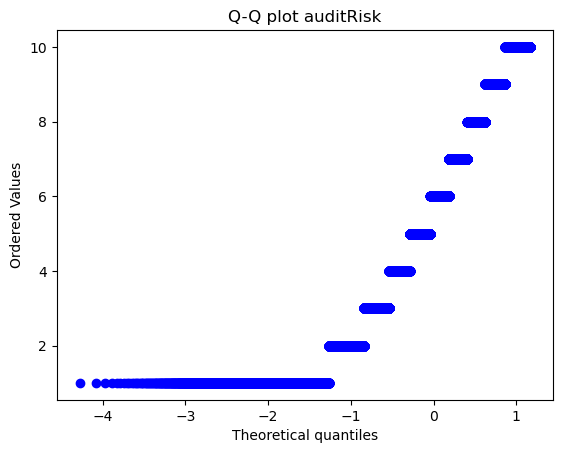

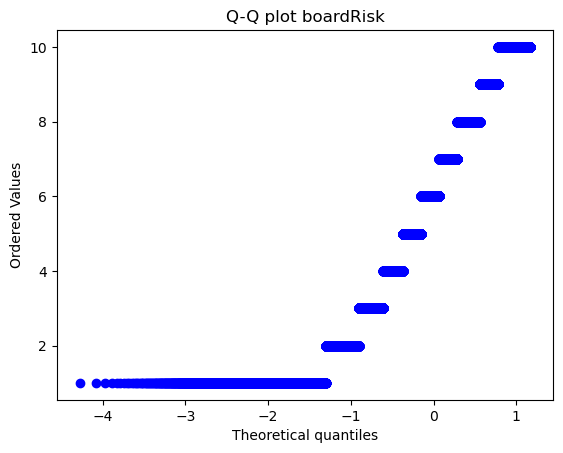

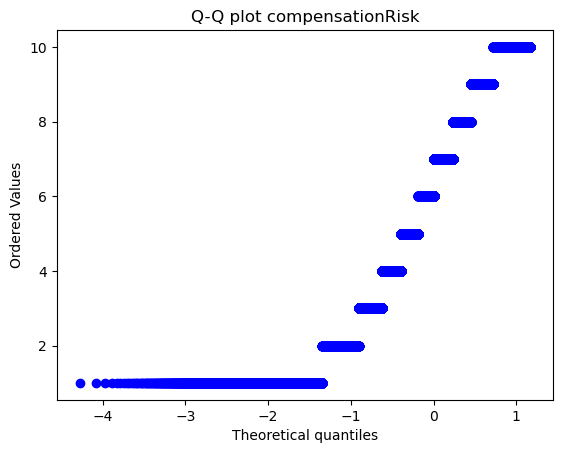

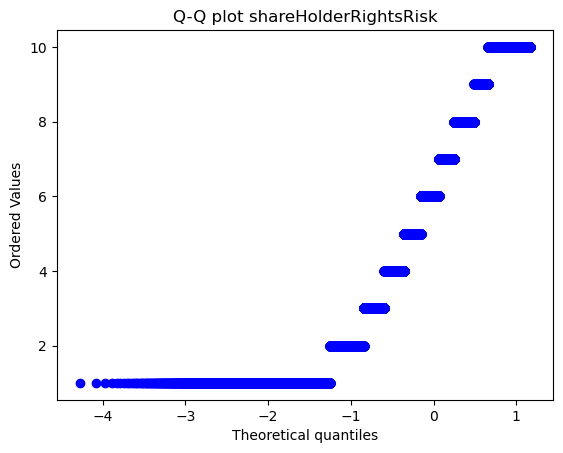

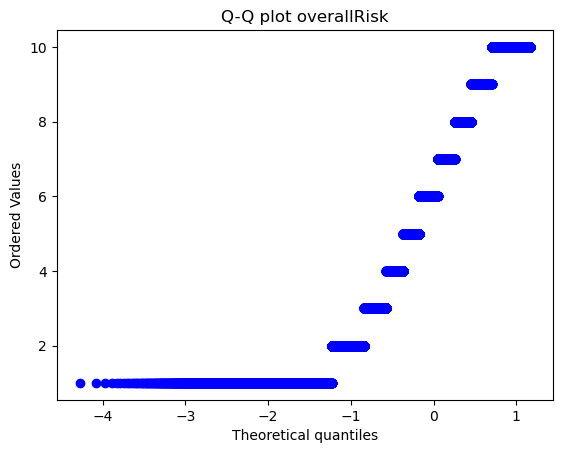

In [7]:
from scipy import stats
    
import matplotlib.pyplot as plt
import numpy as np

columns = [
    'auditRisk',
    'boardRisk', 
    'compensationRisk',
    'shareHolderRightsRisk',
    'overallRisk'
]
for column in columns:
    data_column = data[column].astype('float') # I tuoi dati qui


    stats.probplot(data_column, dist="norm", plot=plt)
    plt.title("Q-Q plot " + str(column))
    plt.show()

In [8]:
to_fill_mean =[
    'auditRisk',
    'boardRisk', 
    'compensationRisk',
    'shareHolderRightsRisk',
    'overallRisk', 
]

column_mean = data[to_fill_mean].mean()

# Sostituisci i valori nulli con la media delle colonne corrispondenti
data[to_fill_mean] = data[to_fill_mean].fillna(column_mean)


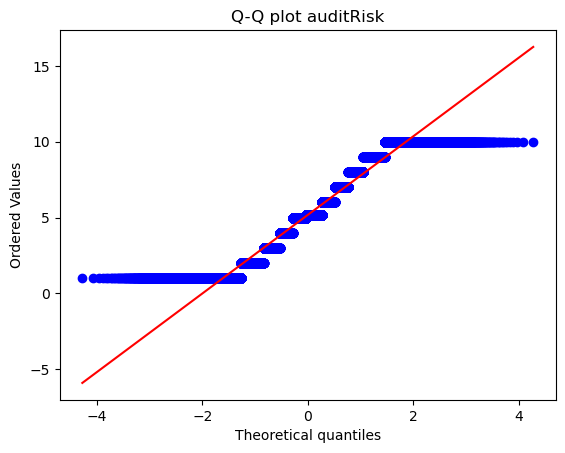

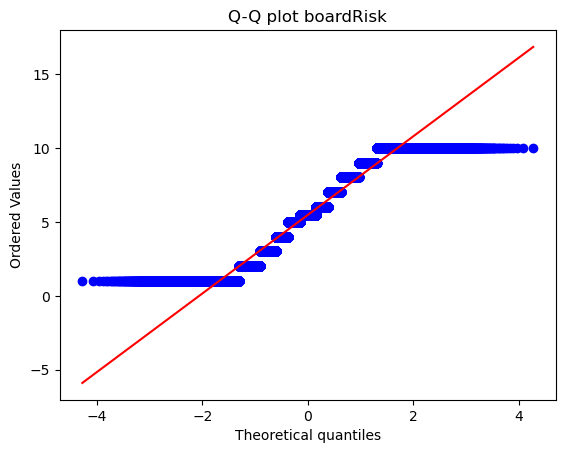

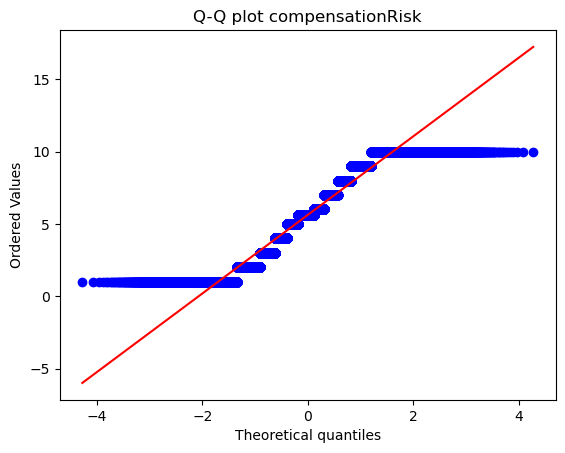

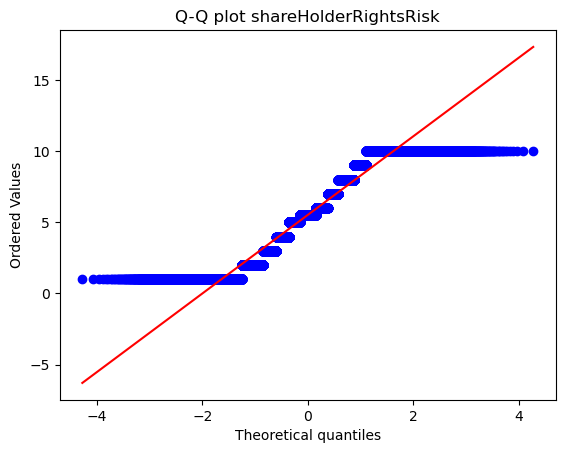

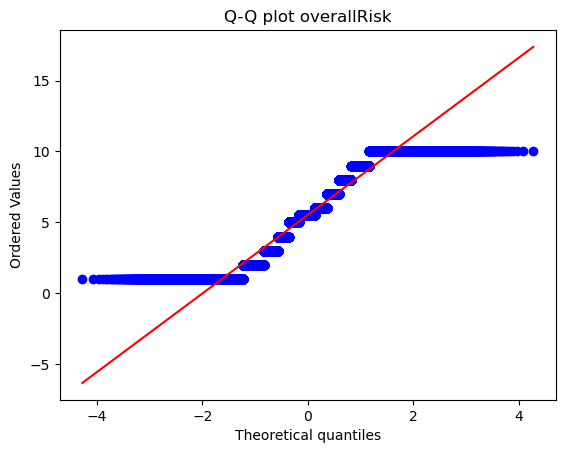

In [9]:
from scipy import stats
    
import matplotlib.pyplot as plt
import numpy as np

columns = [
    'auditRisk',
    'boardRisk', 
    'compensationRisk',
    'shareHolderRightsRisk',
    'overallRisk'
]
for column in columns:
    data_column = data[column].astype('float') # I tuoi dati qui


    stats.probplot(data_column, dist="norm", plot=plt)
    plt.title("Q-Q plot " + str(column))
    plt.show()

# 5) FORMATTING AND ENCODING VARIABLES

#### Obtaining tau (resitual time to expiration) instead of the expiration date

In [10]:
import pandas as pd
import numpy as np

# Assuming 'data' is a DataFrame containing 'lastTradeDate' and 'expirationDate' columns

def tau(row):
    try:
        start_date = pd.to_datetime(row['lastTradeDate']).to_numpy().astype('datetime64[D]')
        end_date = pd.to_datetime(row['expirationDate']).to_numpy().astype('datetime64[D]')
    except ValueError:
        return np.nan
    
    residual_days = np.busday_count(start_date, end_date)
    tau_value = residual_days / 252
    return tau_value

def tau2(row):
    try:
        start_date = pd.to_datetime(row['lastTradeDate']).to_numpy().astype('datetime64[D]')
        end_date = pd.to_datetime(row['expirationDate']).to_numpy().astype('datetime64[D]')
    except ValueError:
        return np.nan
    
    residual_days = (end_date - start_date).astype('timedelta64[D]').astype(int)
    tau_value = residual_days / 365
    return tau_value

# Assuming 'data' is your DataFrame
data['tau'] = data.apply(tau, axis=1)
data['tau2'] = data.apply(tau2, axis=1)



In [11]:
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Filtra solo le colonne con valori mancanti
missing_percentage = missing_percentage[missing_percentage > 5]
missing_percentage

state                        11.637421
fullTimeEmployees             7.577508
governanceEpochDate          12.057412
compensationAsOfEpochDate     5.375613
profitMargins                 6.351515
shortPercentOfFloat           7.769154
priceToBook                   7.395376
pegRatio                     14.915798
enterpriseToEbitda            7.788183
ebitda                        7.274408
debtToEquity                 11.308496
returnOnEquity                6.670925
freeCashflow                  7.876531
revenueGrowth                 5.132318
grossMargins                  7.989344
ebitdaMargins                12.613323
dtype: float64

In [12]:
missing_state = data[data['state'].isnull()]
missing_state['city'].value_counts()

city
Dublin                 680
London                 619
Beijing                567
Hamilton               425
Shanghai               336
                      ... 
Bray                     1
Montrouge                1
Wangen-Brüttisellen      1
Wenzhou                  1
Shouguang                1
Name: count, Length: 188, dtype: int64

In [13]:
data.loc[data['city'] == 'Dublin', 'state'] = 'IE'
data.loc[data['city'] == 'London', 'state'] = 'UK'
data.loc[data['city'] == 'Beijing', 'state'] = 'CN'
data.loc[data['city'] == 'Hamilton', 'state'] = 'BM'
data.loc[data['city'] == 'Shanghai', 'state'] = 'CN'
data.loc[data['city'] == 'Singapore', 'state'] = 'SG'
data.loc[data['city'] == 'Cambridge', 'state'] = 'MA'
data.loc[data['city'] == 'Tel Aviv', 'state'] = 'IL'
data.loc[data['city'] == 'Montevideo', 'state'] = 'UY'
data.loc[data['city'] == 'Buenos Aires', 'state'] = 'AR'
data.loc[data['city'] == 'Veldhoven', 'state'] = 'NL'
data.loc[data['city'] == 'Luxembourg City', 'state'] = 'LU'
data.loc[data['city'] == 'Guangzhou', 'state'] = 'CN'
data.loc[data['city'] == 'Hsinchu City', 'state'] = 'TW'
data.loc[data['city'] == 'Amsterdam', 'state'] = 'NL'
data.loc[data['city'] == 'Hangzhou', 'state'] = 'CN'
data.loc[data['city'] == 'Zurich', 'state'] = 'CH'
data.loc[data['city'] == 'George Town', 'state'] = 'MY'
data.loc[data['city'] == 'Petah Tikva', 'state'] = 'IL'
data.loc[data['city'] == 'Herzliya', 'state'] = 'IL'
data.loc[data['city'] == 'Zug', 'state'] = 'CH'
data.loc[data['city'] == 'Pembroke', 'state'] = 'BM'
data.loc[data['city'] == 'Bagsvaerd', 'state'] = 'DK'
data.loc[data['city'] == 'Pembroke', 'state'] = 'BM'
data.loc[data['city'] == 'Bagsvaerd', 'state'] = 'DK'
data.loc[data['city'] == 'Bagsvaerd', 'state'] = 'DK'
data.loc[data['city'] == 'Toyota', 'state'] = 'JP'
data.loc[data['city'] == 'Walldorf', 'state'] = 'DE'
data.loc[data['city'] == 'Woking', 'state'] = 'UK'
data.loc[data['city'] == 'Basel', 'state'] = 'CH'
data.loc[data['city'] == 'Courbevoie', 'state'] = 'FR'
data.loc[data['city'] == 'Mumbai', 'state'] = 'IN'
data.loc[data['city'] == 'Paris', 'state'] = 'FR'
data.loc[data['city'] == 'Leuven', 'state'] = 'BE'
data.loc[data['city'] == 'Hoofddorp', 'state'] = 'NL'
data.loc[data['city'] == 'Brentford', 'state'] = 'UK'
data.loc[data['city'] == 'Stavanger', 'state'] = 'NO'
data.loc[data['city'] == 'Madrid', 'state'] = 'ES'
data.loc[data['city'] == 'Bengaluru', 'state'] = 'IN'
data.loc[data['city'] == 'Bilbao', 'state'] = 'ES'
data.loc[data['city'] == 'Swords', 'state'] = 'IE'
data.loc[data['city'] == 'Eindhoven', 'state'] = 'NL'
data.loc[data['city'] == 'Wokingham', 'state'] = 'UK'
data.loc[data['city'] == 'Schaffhausen', 'state'] = 'CH'
data.loc[data['city'] == 'Cork', 'state'] = 'IE'
data.loc[data['city'] == 'Geneva', 'state'] = 'CH'
data.loc[data['city'] == 'Weybridge', 'state'] = 'UK'
data.loc[data['city'] == 'Pembroke', 'state'] = 'BM'
data.loc[data['city'] == 'Uxbridge', 'state'] = 'UK'
data.loc[data['city'] == 'Frankfurt am Main', 'state'] = 'DE'
data.loc[data['city'] == 'Issy-les-Moulineaux', 'state'] = 'FR'
data.loc[data['city'] == 'Taipei City', 'state'] = 'TW'
data.loc[data['city'] == 'Edinburgh', 'state'] = 'UK'
data.loc[data['city'] == 'Central', 'state'] = '?'
data.loc[data['city'] == 'Jerusalem', 'state'] = 'IL'
data.loc[data['city'] == 'Pohang', 'state'] = 'KR'
data.loc[data['city'] == 'Kaohsiung', 'state'] = 'TW'
data.loc[data['city'] == 'Newbury', 'state'] = 'UK'
data.loc[data['city'] == 'Bogotá', 'state'] = 'CO'
data.loc[data['city'] == 'Mainz', 'state'] = 'DE'
data.loc[data['city'] == 'Copenhagen', 'state'] = 'DK'
data.loc[data['city'] == 'Seoul', 'state'] = 'KR'
data.loc[data['city'] == 'Espoo', 'state'] = 'FI'
data.loc[data['city'] == 'Shenzhen', 'state'] = 'CN'
data.loc[data['city'] == 'Stockholm', 'state'] = 'SE'
data.loc[data['city'] == 'Grand Cayman', 'state'] = 'KY'
data.loc[data['city'] == 'Ra anana', 'state'] = 'IL'
data.loc[data['city'] == 'Basildon', 'state'] = 'UK'
data.loc[data['city'] == 'Crawley', 'state'] = 'UK'
data.loc[data['city'] == 'Lausanne', 'state'] = 'CH'
data.loc[data['city'] == 'Sandton', 'state'] = 'ZA'
data.loc[data['city'] == 'Lima', 'state'] = 'PE'
data.loc[data['city'] == 'Santiago', 'state'] = 'CL'
data.loc[data['city'] == 'Hyderabad', 'state'] = 'IN'
data.loc[data['city'] == 'Watford', 'state'] = 'UK'
data.loc[data['city'] == 'Bad Homburg', 'state'] = 'DE'
data.loc[data['city'] == 'Hai Phong City', 'state'] = 'VN'
data.loc[data['city'] == 'The Hague', 'state'] = 'NL'
data.loc[data['city'] == 'Naju-Si', 'state'] = 'KR'
data.loc[data['city'] == 'Venlo', 'state'] = 'NL'
data.loc[data['city'] == 'Haifa', 'state'] = 'IL'
data.loc[data['city'] == 'Medellín', 'state'] = 'CO'
data.loc[data['city'] == 'Luxembourg', 'state'] = 'LU'
data.loc[data['city'] == 'Hellerup', 'state'] = 'DK'
data.loc[data['city'] == 'Helsinki', 'state'] = 'FI'
data.loc[data['city'] == 'Guiyang', 'state'] = 'CN'
data.loc[data['city'] == 'Gurugram', 'state'] = 'IN'
data.loc[data['city'] == 'Sheung Wan', 'state'] = 'HK'
data.loc[data['city'] == 'Seongnam-si', 'state'] = 'KR'
data.loc[data['city'] == 'Barcelona', 'state'] = 'ES'
data.loc[data['city'] == 'Rehovot', 'state'] = 'IL'
data.loc[data['city'] == 'Limassol', 'state'] = 'CY'
data.loc[data['city'] == 'Steinhausen', 'state'] = 'CH'
data.loc[data['city'] == 'Randfontein', 'state'] = 'ZA'
data.loc[data['city'] == 'Johannesburg', 'state'] = 'ZA'
data.loc[data['city'] == 'Istanbul', 'state'] = 'TR'
data.loc[data['city'] == 'Shannon', 'state'] = 'IE'
data.loc[data['city'] == 'Panama City', 'state'] = 'PA'
data.loc[data['city'] == 'Almaty', 'state'] = 'KZ'
data.loc[data['city'] == 'Santiago de Chile', 'state'] = 'CL'
data.loc[data['city'] == 'Monaco', 'state'] = 'MC'
data.loc[data['city'] == 'Sankt Gallen', 'state'] = 'CH'
data.loc[data['city'] == 'Saint Peter Port', 'state'] = 'GG'
data.loc[data['city'] == 'Gothenburg', 'state'] = 'SE'
data.loc[data['city'] == 'Antwerp', 'state'] = 'BE'
data.loc[data['city'] == 'Feltham', 'state'] = 'UK'
data.loc[data['city'] == 'Weltevreden Park', 'state'] = 'ZA'
data.loc[data['city'] == 'Abingdon', 'state'] = 'UK'
data.loc[data['city'] == 'Hong Kong', 'state'] = 'HK'
data.loc[data['city'] == 'Uppsala', 'state'] = 'SE'
data.loc[data['city'] == 'Planegg', 'state'] = 'DE'
data.loc[data['city'] == 'Mexico City', 'state'] = 'MX'
data.loc[data['city'] == 'Utrecht', 'state'] = 'NL'
data.loc[data['city'] == 'Herzliya Pituach', 'state'] = 'IL'
data.loc[data['city'] == 'Barranquilla', 'state'] = 'CO'
data.loc[data['city'] == 'Manchester', 'state'] = 'UK'
data.loc[data['city'] == 'Dundalk', 'state'] = 'IE'
data.loc[data['city'] == 'Rolle', 'state'] = 'CH'
data.loc[data['city'] == 'Mechelen', 'state'] = 'BE'
data.loc[data['city'] == 'Rosh Haayin', 'state'] = 'IL'
data.loc[data['city'] == 'Marousi', 'state'] = 'GR'
data.loc[data['city'] == 'Yokne am', 'state'] = 'IL'
data.loc[data['city'] == 'Holon', 'state'] = 'IL'
data.loc[data['city'] == 'Saint Helier', 'state'] = 'NY'
data.loc[data['city'] == 'Piraeus', 'state'] = 'GR'
data.loc[data['city'] == 'Oslo', 'state'] = 'NO'
data.loc[data['city'] == 'Ra\'anana', 'state'] = 'IL'
data.loc[data['city'] == 'Yokne\'am', 'state'] = 'IL'
data.loc[data['city'] == 'Alajuela', 'state'] = 'CR'
data.loc[data['city'] == 'Senningerberg', 'state'] = 'LU'
data.loc[data['city'] == 'Nassau', 'state'] = 'BS'
data.loc[data['city'] == 'Tübingen', 'state'] = 'DE'
data.loc[data['city'] == 'Shang Rao', 'state'] = 'CN'
data.loc[data['city'] == 'Altrincham', 'state'] = 'UK'
data.loc[data['city'] == 'Wangen-Brüttisellen', 'state'] = 'CH'
data.loc[data['city'] == 'Tainan City', 'state'] = 'TW'
data.loc[data['city'] == 'Athens', 'state'] = 'GR'
data.loc[data['city'] == 'Rosario', 'state'] = 'AR'
data.loc[data['city'] == 'Dubai', 'state'] = 'AE'
data.loc[data['city'] == 'Oxford', 'state'] = 'UK'
data.loc[data['city'] == 'Givatayim', 'state'] = 'IL'
data.loc[data['city'] == 'Malmö', 'state'] = 'SE'
data.loc[data['city'] == 'Ness Ziona', 'state'] = 'IL'
data.loc[data['city'] == 'Amman', 'state'] = 'JO'
data.loc[data['city'] == 'Or Yehuda', 'state'] = 'IL'
data.loc[data['city'] == 'Azor', 'state'] = 'IL'
data.loc[data['city'] == 'Xiamen', 'state'] = 'CN'
data.loc[data['city'] == 'Berlin', 'state'] = 'DE'
data.loc[data['city'] == 'Neve Ilan', 'state'] = 'IL'
data.loc[data['city'] == 'Weßling', 'state'] = 'DE'
data.loc[data['city'] == 'Taipei', 'state'] = 'TW'
data.loc[data['city'] == 'Lod', 'state'] = 'IL'
data.loc[data['city'] == 'Epalinges', 'state'] = 'CH'
data.loc[data['city'] == 'Huzhou', 'state'] = 'CN'
data.loc[data['city'] == 'Munich', 'state'] = 'DE'
data.loc[data['city'] == 'Lyon', 'state'] = 'FR'
data.loc[data['city'] == 'Rosh Ha’Ayin', 'state'] = 'IL'
data.loc[data['city'] == 'Bristol', 'state'] = 'UK'
data.loc[data['city'] == 'Chennai', 'state'] = 'IN'
data.loc[data['city'] == 'Hod Hasharon', 'state'] = 'IL'
data.loc[data['city'] == 'Arnhem', 'state'] = 'NL'
data.loc[data['city'] == 'Wuhan', 'state'] = 'CN'
data.loc[data['city'] == 'Cheongju', 'state'] = 'KR'
data.loc[data['city'] == 'Leiden', 'state'] = 'NL'
data.loc[data['city'] == 'Düsseldorf', 'state'] = 'DE'
data.loc[data['city'] == 'Jinhua', 'state'] = 'CN'
data.loc[data['city'] == 'Aberdeen', 'state'] = 'UK'
data.loc[data['city'] == 'Glyfada', 'state'] = 'GR'
data.loc[data['city'] == 'Montrouge', 'state'] = 'FR'
data.loc[data['city'] == 'Yavne', 'state'] = 'IL'
data.loc[data['city'] == 'Menashe', 'state'] = 'IL'
data.loc[data['city'] == 'Tsuen Wan', 'state'] = 'HK'
data.loc[data['city'] == 'Jingzhou', 'state'] = 'CN'
data.loc[data['city'] == 'Dalian', 'state'] = 'CN'
data.loc[data['city'] == 'Jena', 'state'] = 'DE'
data.loc[data['city'] == 'Karmiel', 'state'] = 'IL'
data.loc[data['city'] == 'Nanjing', 'state'] = 'CN'
data.loc[data['city'] == 'Hod HaSharon', 'state'] = 'IL'
data.loc[data['city'] == 'Heidelberg', 'state'] = 'DE'
data.loc[data['city'] == 'Bray', 'state'] = 'IE'
data.loc[data['city'] == 'Tsim Sha Tsui', 'state'] = 'HK'
data.loc[data['city'] == 'Hevel Modi\'in', 'state'] = 'IL'
data.loc[data['city'] == 'Hefei', 'state'] = 'CN'
data.loc[data['city'] == 'Yokneam Illit', 'state'] = 'IL'
data.loc[data['city'] == 'Xi\'an', 'state'] = 'CN'
data.loc[data['city'] == 'Quarry Bay', 'state'] = 'HK'
data.loc[data['city'] == 'Kwun Tong', 'state'] = 'HK'
data.loc[data['city'] == 'Sha Tin', 'state'] = 'HK'
data.loc[data['city'] == 'Wenzhou', 'state'] = 'CN'
data.loc[data['city'] == 'Horsholm', 'state'] = 'DK'
data.loc[data['city'] == 'Shouguang', 'state'] = 'CN'
data.loc[data['city'] == 'Dongguan', 'state'] = 'CN'

In [18]:
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Filtra solo le colonne con valori mancanti
missing_percentage = missing_percentage[missing_percentage > 0.5]
missing_percentage

zip                              0.660568
fullTimeEmployees                7.577508
beta                             2.695282
forwardPE                        1.213760
bidSize                          0.863088
askSize                          0.801925
priceToSalesTrailing12Months     3.062265
enterpriseValue                  0.623870
profitMargins                    6.351515
sharesPercentSharesOut           0.598045
heldPercentInsiders              2.063257
shortPercentOfFloat              7.769154
bookValue                        0.576298
priceToBook                      7.395376
trailingEps                      0.523290
forwardEps                       1.327933
pegRatio                        14.915798
enterpriseToRevenue              3.714678
enterpriseToEbitda               7.788183
targetHighPrice                  3.100322
targetLowPrice                   3.100322
targetMeanPrice                  3.100322
targetMedianPrice                3.100322
recommendationMean               1

In [21]:
data.to_csv('full_data_2.csv')

#### Estimating missing values

In [38]:
non_float_column = [
    'lastTradeDate',
    'ticker',
    'type',
    'address1',
    'city',
    'state',
    'zip',
    'country',
    'industry',
    'sector',
    'exchange',
    'timeZoneFullTime',
    'timeZoneShortName',
    'recommendationKey',
    'expirationDate',
    'inTheMoney'
]
float_column = data.columns.difference(non_float_column)


data[float_column] = data[float_column].astype(float)

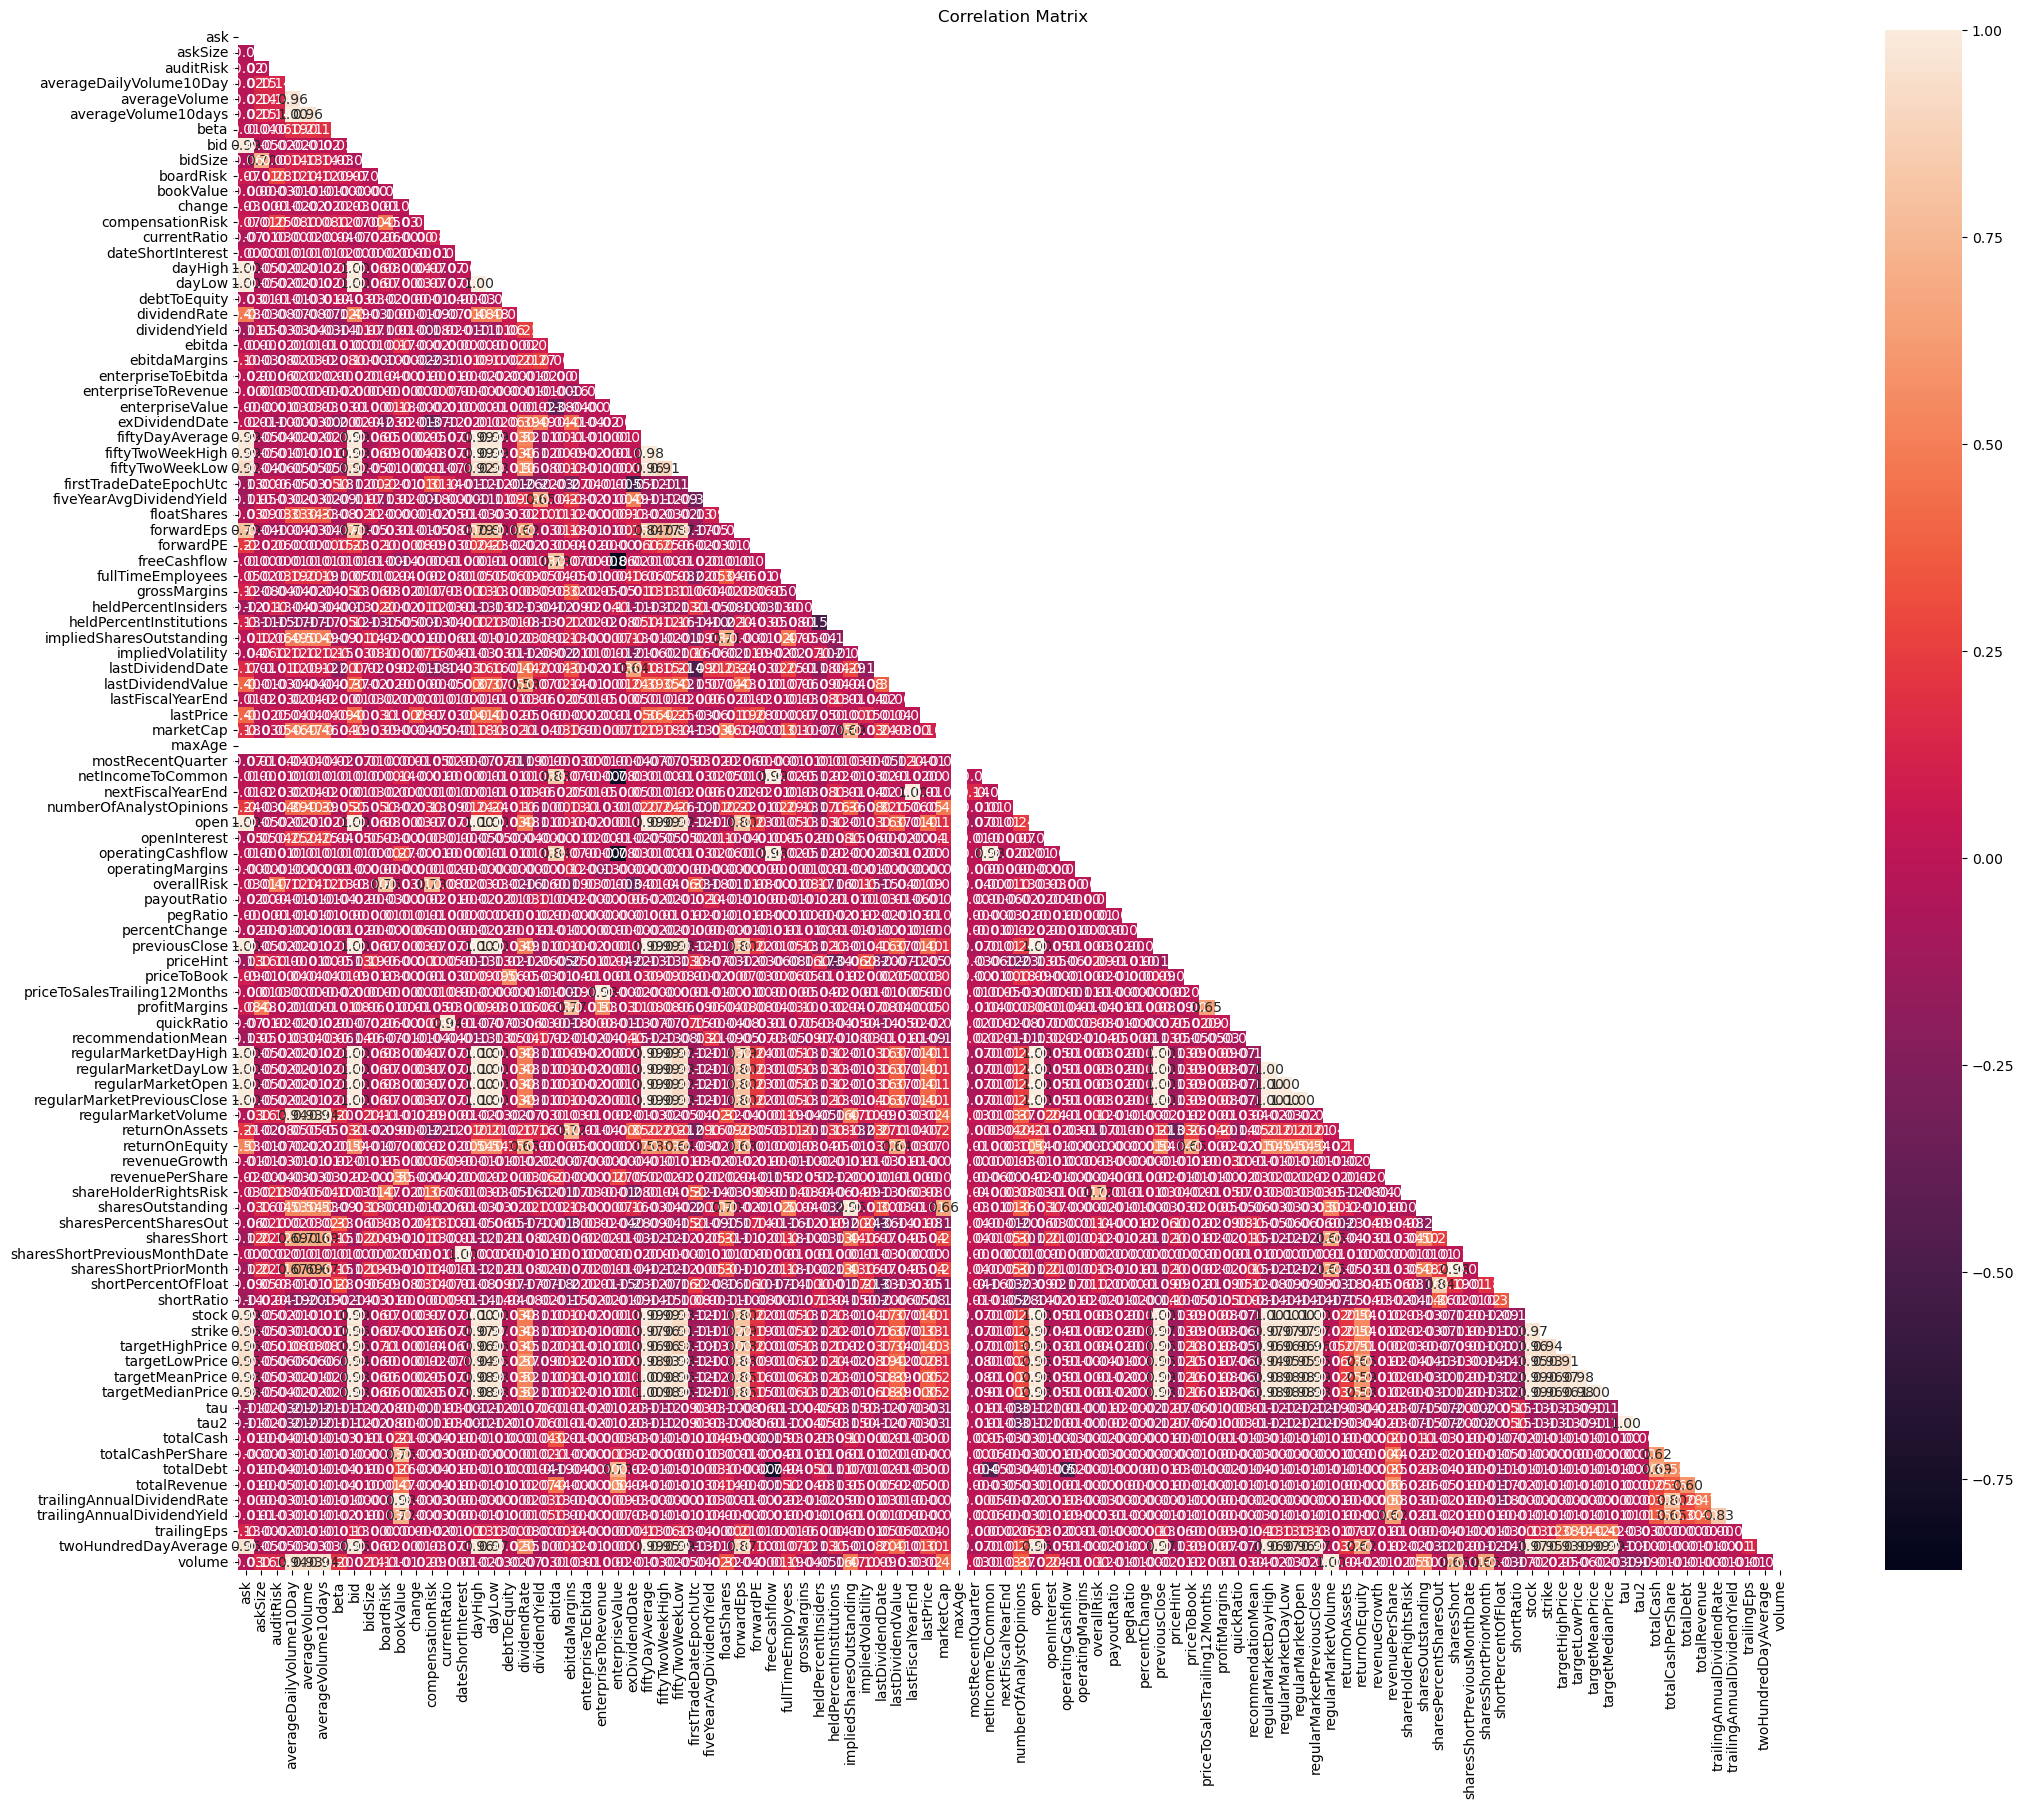

In [44]:
import seaborn as sns

corr_data = data[float_column]
corr_matrix = corr_data.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create a heatmap using Seaborn
plt.figure(figsize=(25, 20))
sns.heatmap(corr_matrix,mask = mask,  annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#### Encoding Type 

#### Convering from string to float